# Instructions
### Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.  

### We will perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative, for the website Yelp.  

### Build your own classifier, and when you're satisfied with its performance, test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.
---

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Grab and process the data
data_path = 'C:/Users/ccarlsjh/Desktop/Important Files/Untitled Folder/Class/2 Supervised learning/Challenges/yelp_sentiment.txt'
reviews = pd.read_csv(data_path, delimiter= '\t', header=None)
reviews.columns = ['sentence', 'satisfied']

In [10]:
keywords = ['disappointed','lost','returned','unhappy','mad','angry','ruined']

for key in keywords:
    reviews[str(key)] = reviews.sentence.str.contains(
        str(key),
        case=False
    )

In [11]:
# Lets convert sentiment to boolean so we can prepare for modeling.
reviews['satisfied'] = (reviews['satisfied'] == 1)

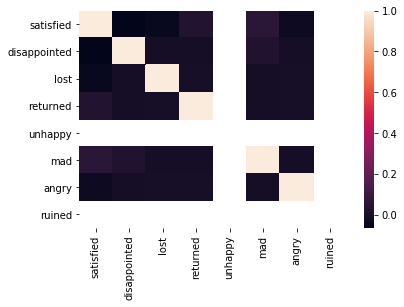

In [12]:
sns.heatmap(reviews.corr())

In [13]:
data = reviews[keywords]
target = reviews['satisfied']

In [16]:
from sklearn.naive_bayes import BernoulliNB

# instantiate model and store as new variable
bnb = BernoulliNB()

# fit model to data
bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 488
